# 3x2 pt. Firecrown Example with DES Data

Example 3x2 pt. Firecrown run with DES data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

import sacc

%matplotlib notebook
sns.set()

In [2]:
# set this to your local analysis ID
# we have two because we want to compare the model evaluated at the fiducial parameters to the MCMC output
ANALYSIS_ID1 = 'c1fc6f3401c54fc983c5dc36c4fe4c8b'
ANALYSIS_ID2 = 'd8678472eabf4b989343c6355284c5e5'

In [3]:
output_path1 = '/global/cscratch1/sd/elp25/txpipe-reanalysis/data/firecrown_example/output_'+ANALYSIS_ID1
output_path2 = '/global/cscratch1/sd/elp25/txpipe-reanalysis/data/firecrown_example/output_'+ANALYSIS_ID2

The DES data vector is `[src-src, lens-src, lens-lens]` where
all unique combinations are kept except that only the diagonal `lens-lens` combinations are kept.

In [4]:
n_src = 4
n_lens = 5

In [5]:
des_data = sacc.Sacc.load_fits(output_path2+'/statistics/two_point/sacc_measured.fits')
fc_data_fiducial = sacc.Sacc.load_fits(output_path1+'/statistics/two_point/sacc_predicted.fits')
fc_data = sacc.Sacc.load_fits(output_path2+'/statistics/two_point/sacc_predicted.fits')

## Input Redshift Distributions

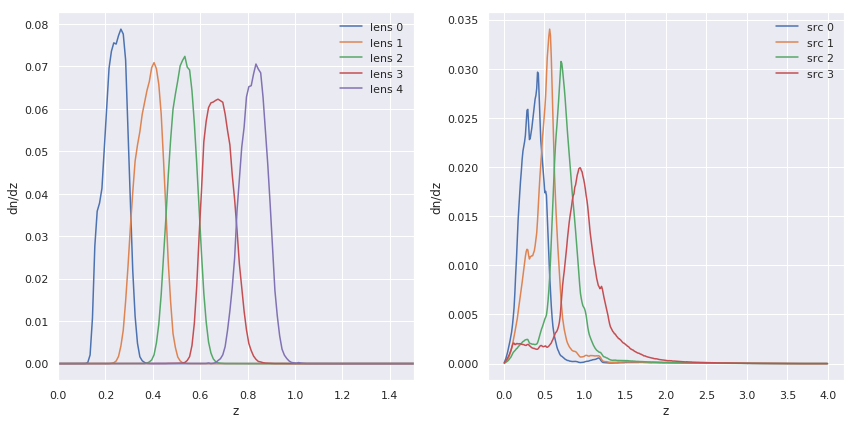

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax = axs[0]
for i in range(n_lens):
    tr = fc_data.get_tracer('lens%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='lens %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)
ax.set_xlim(0.0, 1.5)

ax = axs[1]
for i in range(n_src):
    tr = fc_data.get_tracer('src%d' % i)
    ax.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i)

ax.set_xlabel('z')
ax.set_ylabel('dn/dz')
ax.legend(loc=1, frameon=False)

plt.tight_layout()

# Input Data Vectors Compared to Firecrown Predictions

## Cosmic Shear

In [23]:
i = 0
j = 0

In [24]:
theta, xip, cov = des_data.get_theta_xi('galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j,return_cov=True)

In [26]:
np.sqrt(np.diagonal(cov))

array([0.00493021, 0.00459195, 0.00424634, 0.00388874, 0.00352198,
       0.00315622, 0.00280524, 0.00247864, 0.00333666, 0.00312543,
       0.00290441, 0.00267148, 0.00242806, 0.00217987, 0.00193632])

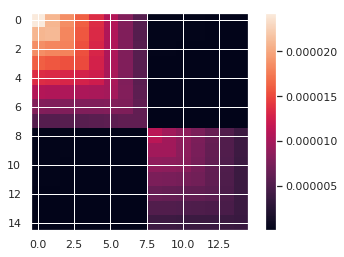

In [25]:
plt.imshow(cov)
plt.colorbar()

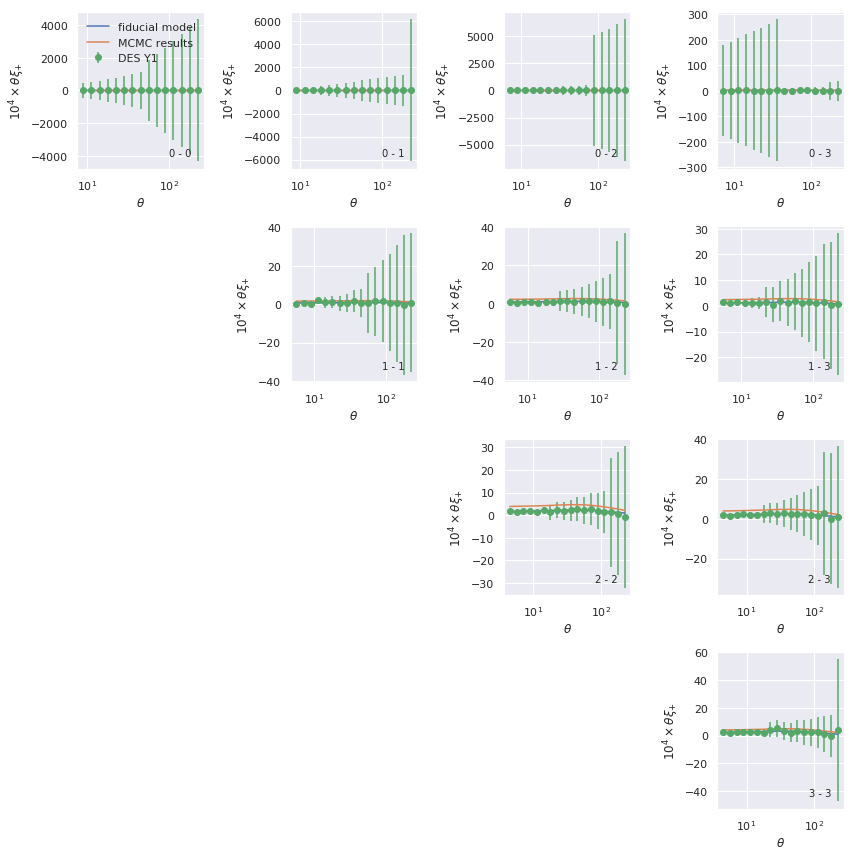

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xip = fc_data.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)
        
        # read in the firecrown
        theta_fid, xip_fid = fc_data_fiducial.get_theta_xi(
            'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)
        
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta_fid, 
            xip_fid*fac, 
            label='fiducial model')
        
        ax.semilogx(
            theta, 
            xip*fac, 
            label='MCMC results')
        
        # des
        theta, xip, xip_cov = des_data.get_theta_xi(
             'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j,return_cov=True)        
        ax.errorbar(
            theta, 
            xip*fac, 
            fmt='o',yerr= fac*np.sqrt(np.diagonal(xip_cov)),
            label='DES Y1')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xscale('log')
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{+}$')
            
plt.tight_layout()

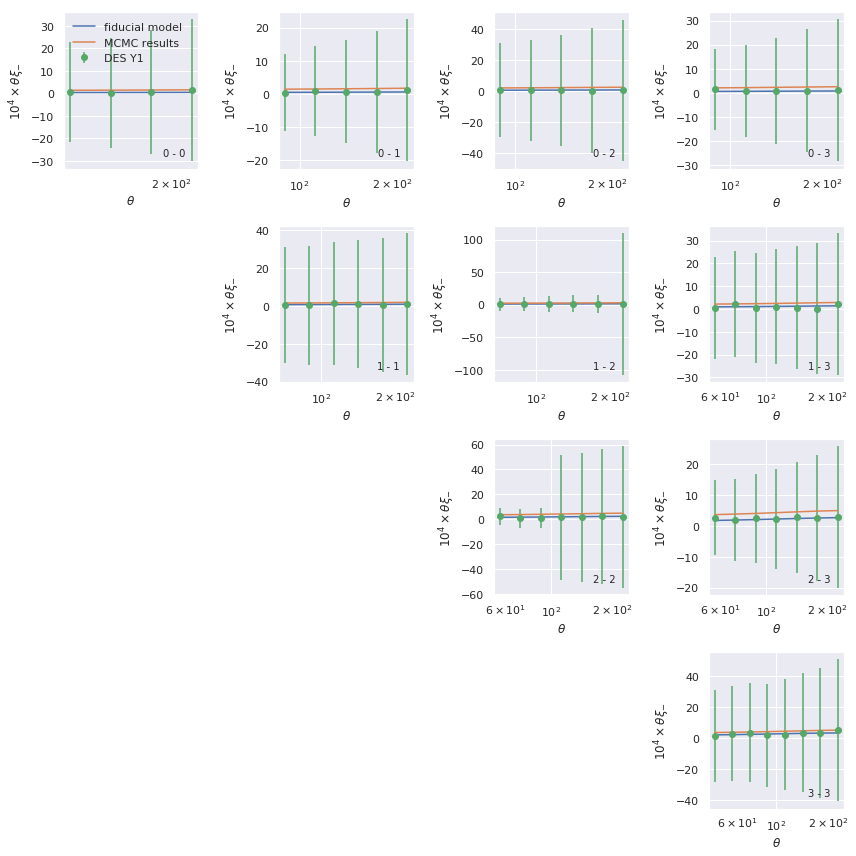

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        # read in the firecrown
        theta, xim = fc_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j)
        
        theta_fid, xim_fid = fc_data_fiducial.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j)
        
        ax = axs[i, j]
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        # firecrown
        ax.semilogx(
            theta_fid, 
            fac * xim_fid, 
            label='fiducial model')
        
        ax.semilogx(
            theta, 
            fac * xim, 
            label='MCMC results')
        
        # des
        theta, xim, xim_cov = des_data.get_theta_xi(
            'galaxy_shear_xi_minus', 
            'src%d' % i, 
            'src%d' % j,return_cov=True)        
        ax.errorbar(
            theta, 
            fac * xim, 
            fmt='o',
            label='DES Y1',yerr=fac* np.sqrt(np.diagonal(xim_cov)))
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xscale('log')
        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{-}$')
            
plt.tight_layout()

## GG Lensing

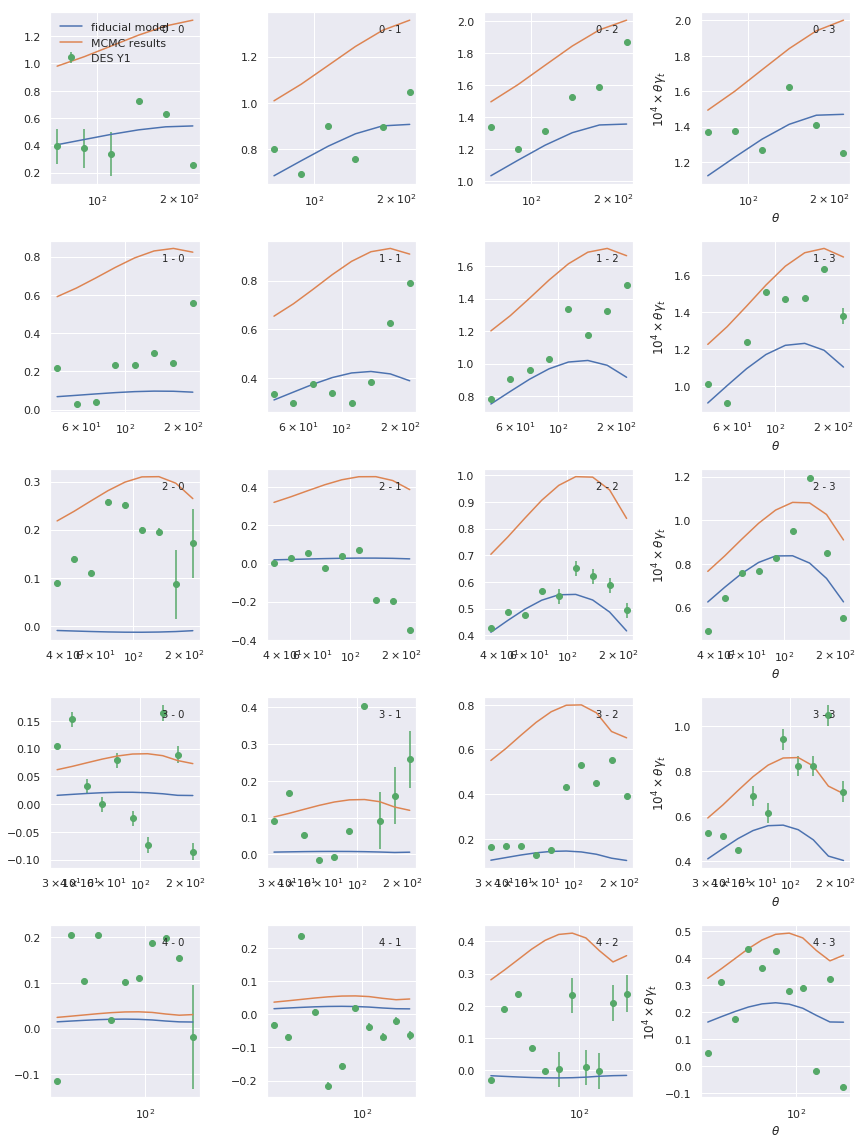

In [36]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 16))

for lensi in range(n_lens):
    for srcj in range(n_src):
        ax = axs[lensi, srcj]

        # read in the firecrown
        theta, xi = fc_data.get_theta_xi(
            'galaxy_shearDensity_xi_t',
            'lens%d' % lensi,
            'src%d' % srcj)
        
        theta_fid, xi_fid = fc_data_fiducial.get_theta_xi(
            'galaxy_shearDensity_xi_t',
            'lens%d' % lensi,
            'src%d' % srcj)
        
        # this is a factor of 10^2 x theta to take out the dynamic range
        fac = 1e2 * theta
        
        # firecrown
        
        ax.semilogx(
            theta_fid, 
            fac * xi_fid,
            label='fiducial model')
        
        ax.semilogx(
            theta, 
            fac * xi,
            label='MCMC results')

        theta, xi, xi_cov = des_data.get_theta_xi(
            'galaxy_shearDensity_xi_t',
            'lens%d' % lensi,
            'src%d' % srcj,return_cov=True)
        
        ax.errorbar(
            theta, 
            fac * xi,
            fmt='o',
            label='DES Y1',yerr=fac*np.sqrt(np.diagonal(xi_cov)))
    
        if lensi == 0 and srcj == 0:
            ax.legend(loc=2, frameon=False)

        ax.text(
            0.9, 0.9, '%d - %d' % (lensi, srcj), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta\gamma_{t}$')
            
plt.tight_layout()

## Clustering

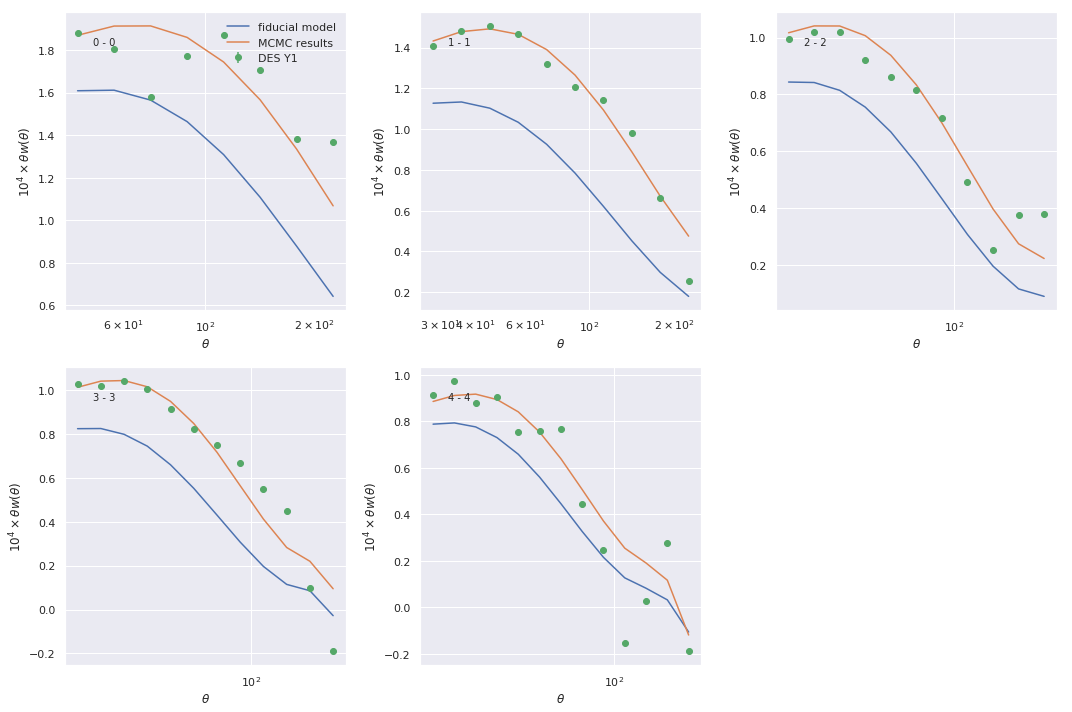

In [41]:
# get loc excluding cosmic shear and gg lensing
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs = axs.ravel()
axs[-1].axis('off')
for i in range(n_lens):
    ax = axs[i]

    # read in the firecrown values
    
    theta_fid, xi_fid = fc_data_fiducial.get_theta_xi(
        'galaxy_density_xi',
        'lens%d' % i,
        'lens%d' % i)
    
    theta, xi = fc_data.get_theta_xi(
        'galaxy_density_xi',
        'lens%d' % i,
        'lens%d' % i)
        
    # set the factor just to 1*theta for this plot (matching to DES paper)
    fac = 1*theta
        
    # firecrown
    ax.semilogx(
        theta_fid, 
        (fac * xi_fid),
        label='fiducial model')
    
    ax.semilogx(
        theta, 
        (fac * xi),
        label='MCMC results')
        
    # des
    theta, xi, xi_cov = des_data.get_theta_xi(
        'galaxy_density_xi',
        'lens%d' % i,
        'lens%d' % i,return_cov=True)
    
    ax.errorbar(
        theta, 
        (fac * xi), 
        fmt='o',
        label='DES Y1',yerr=fac*np.sqrt(np.diagonal(xi_cov)))
    
    if i == 0:
        ax.legend(loc=1, frameon=False)
        
    ax.text(
        0.1, 0.9, '%d - %d' % (i, i), 
        horizontalalignment='left',
        verticalalignment='center', 
        transform=ax.transAxes)
    
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$10^{4}\times\theta w(\theta)$')
            
plt.tight_layout()

# MCMC Chains

In [11]:
import sys

In [12]:
sys.path.insert(0,'/global/cscratch1/sd/elp25/packages/corner/corner')

In [81]:
import pandas as pd
import corner

chains = pd.read_csv(output_path2+'/analysis.csv')
chains['Omega_m'] = chains['Omega_c'] + 0.0485
Omega_m_fid = 0.2545 + 0.0485
sigma8_fid = 0.801

In [14]:
msk = chains.mcmc_step > 750

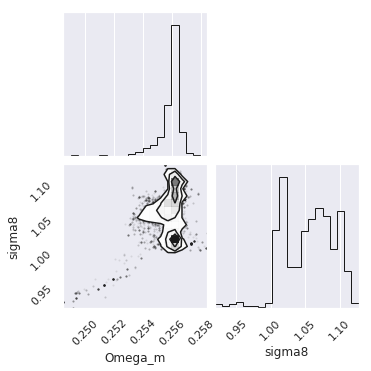

In [62]:
#fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = corner.corner(
    chains.loc[msk, ['Omega_m', 'sigma8']].to_numpy(),
    labels=['Omega_m', 'sigma8'])

# Extract the axes
axes = np.array(fig.axes)

fig.axes[2].scatter([Omega_m_fid],[sigma8_fid],s=100,c='g',marker='x')

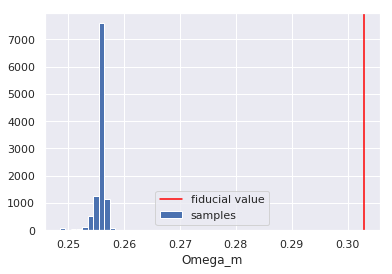

In [82]:
plt.hist(chains.loc[msk, ['Omega_m']].to_numpy(),label='samples')
plt.axvline([Omega_m_fid],color='red',label='fiducial value')
plt.legend(loc='best')
plt.xlabel('Omega_m')
plt.show()

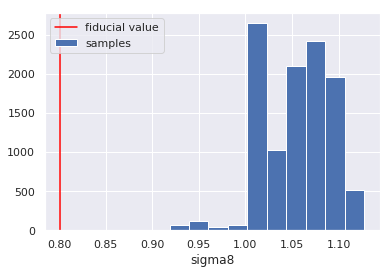

In [84]:
plt.hist(chains.loc[msk, ['sigma8']].to_numpy(),label='samples')
plt.axvline([sigma8_fid],color='red',label='fiducial value')
plt.legend(loc='best')
plt.xlabel('sigma8')
plt.show()

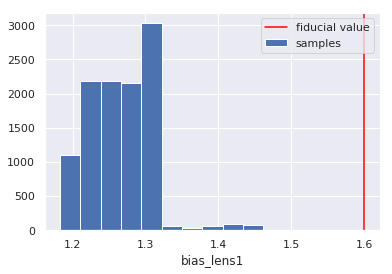

In [85]:
plt.hist(chains.loc[msk, ['bias_lens1']].to_numpy(),label='samples')
plt.axvline([1.6],color='red',label='fiducial value')
plt.legend(loc='best')
plt.xlabel('bias_lens1')
plt.show()